Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder, StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
df.shape

(10000, 24)

Make function to prepare our dataset

In [5]:
def prepare_data(df):
    label_encoder = LabelEncoder()
    ordinal_encoder = OrdinalEncoder()
    standard_scaler = StandardScaler()
    df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'].values)
    df[['Customer Type',  'Class']] = ordinal_encoder.fit_transform(df[['Customer Type', 'Class']].values)

    drop_col = ['Departure/Arrival time convenient','Arrival Delay in Minutes', 'Departure Delay in Minutes', 
    'Gate location', 'id', 'Gender', 'Ease of Online booking', 'Age']
    df.drop(columns=drop_col, inplace=True)

    return df

In [6]:
df['satisfaction'].value_counts()

satisfaction
0    5000
1    5000
Name: count, dtype: int64

In [7]:
df = prepare_data(df)
df.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1.0,0,1.0,571,2,4,2,4,4,3,1,3,4,3,4,0
1,0.0,0,0.0,1431,4,3,5,4,5,5,5,5,3,5,3,1
2,0.0,0,1.0,867,1,4,4,3,1,1,1,1,1,1,2,0
3,0.0,0,0.0,1550,3,2,2,2,2,4,4,5,5,4,2,1
4,0.0,1,1.0,526,3,4,3,4,4,5,2,5,3,5,4,0


Analyzing our dataset

In [8]:
df['service'] = df['Inflight wifi service']+df['Inflight service']+df['Checkin service']+df['Leg room service']+df['On-board service']+df['Seat comfort']+df['Cleanliness']+df['Online boarding']+df['Class']+df['Customer Type']
df['during'] = df['Flight Distance']*df['service']

In [9]:
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

satisfaction              1.000000
service                   0.528439
Online boarding           0.504986
Type of Travel            0.482266
Class                     0.463430
during                    0.402931
Inflight entertainment    0.400900
Seat comfort              0.342294
On-board service          0.326426
Leg room service          0.324368
Cleanliness               0.310338
Flight Distance           0.298703
Inflight wifi service     0.277395
Baggage handling          0.247965
Inflight service          0.240584
Checkin service           0.232359
Food and drink            0.207854
Customer Type             0.181592
dtype: float64

In [10]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,service,during
Customer Type,1.000000,0.280023,0.058353,0.226549,0.003499,0.072036,0.195554,0.174279,0.126166,0.061039,0.071066,0.014837,0.032102,0.026231,0.101625,0.181592,0.071044,0.223751
Type of Travel,0.280023,1.000000,0.492668,0.276756,0.099728,0.077951,0.241535,0.150680,0.186244,0.080640,0.153127,0.035709,0.006062,0.038847,0.110651,0.482266,0.167848,0.291437
Class,0.058353,0.492668,1.000000,0.432971,0.008206,0.081087,0.306592,0.215445,0.197936,0.221749,0.218564,0.187201,0.168781,0.163099,0.133407,0.463430,0.215341,0.446019
Flight Distance,0.226549,0.276756,0.432971,1.000000,0.002341,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.298703,0.138098,0.955250
Inflight wifi service,0.003499,0.099728,0.008206,0.002341,1.000000,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.277395,0.501600,0.111364
Food and drink,0.072036,0.077951,0.081087,0.065939,0.119807,1.000000,0.239007,0.573063,0.598209,0.062373,0.045929,0.030299,0.087117,0.035568,0.641701,0.207854,0.407085,0.143579
Online boarding,0.195554,0.241535,0.306592,0.213859,0.438034,0.239007,1.000000,0.414889,0.292397,0.165847,0.133977,0.080804,0.207733,0.077808,0.341899,0.504986,0.606761,0.332328
Seat comfort,0.174279,0.150680,0.215445,0.170203,0.107020,0.573063,0.414889,1.000000,0.615310,0.136570,0.121991,0.081107,0.192491,0.074447,0.677454,0.342294,0.598425,0.290214
Inflight entertainment,0.126166,0.186244,0.197936,0.150573,0.198351,0.598209,0.292397,0.615310,1.000000,0.442295,0.338588,0.393506,0.109921,0.418871,0.688927,0.400900,0.682279,0.290743
On-board service,0.061039,0.080640,0.221749,0.115167,0.133511,0.062373,0.165847,0.136570,0.442295,1.000000,0.379646,0.542059,0.227699,0.575932,0.142598,0.326426,0.594128,0.244445


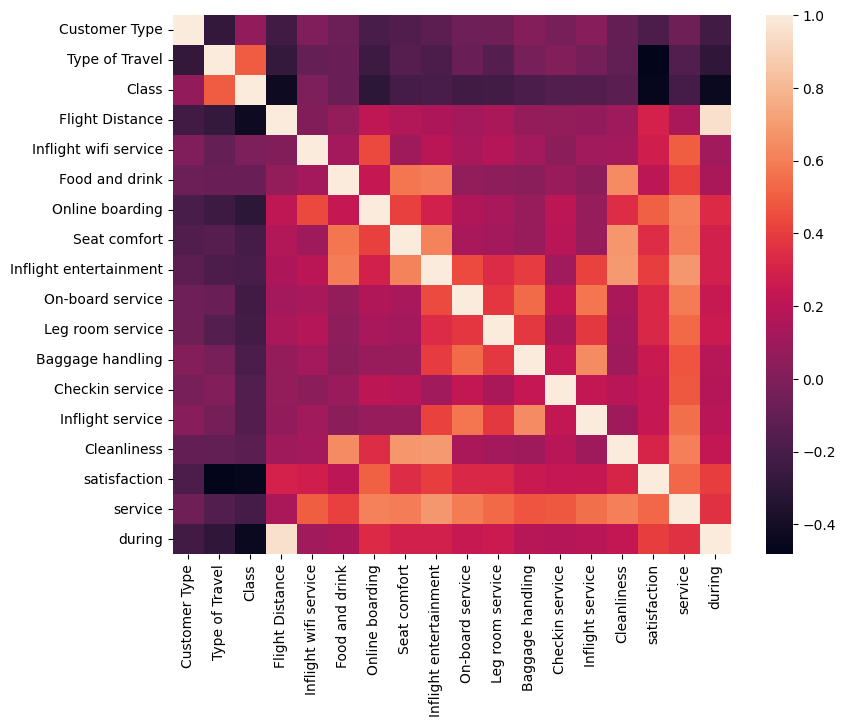

In [11]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr())
plt.show()

Divide our prepared dataset to Xset and Yset

In [12]:
X = df.drop(columns='satisfaction').values
Y = df['satisfaction'].values

Train our model using RandomForestClassifier

In [13]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X,Y)


[LightGBM] [Info] Number of positive: 5000, number of negative: 5000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

Testing model accuracy

In [14]:
from sklearn.model_selection import cross_val_score

print(f"Your cross_val_score is: {cross_val_score(model, X, Y).mean()}") 

[LightGBM] [Info] Number of positive: 4000, number of negative: 4000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4000, number of negative: 4000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

Download test dataset to make predictions

In [15]:
test = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')
test.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0


In [16]:
test.shape

(4000, 23)

In [17]:
test = prepare_data(test)
test.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,1,1.0,2704,2,2,3,5,2,4,4,3,5,1,5
1,0.0,0,0.0,1623,1,3,4,4,2,2,2,2,4,2,3
2,0.0,0,0.0,338,4,2,5,5,5,5,5,5,4,5,4
3,0.0,0,2.0,95,0,5,0,1,5,4,4,1,3,3,5
4,0.0,1,1.0,602,4,4,5,5,5,4,5,4,5,5,5


Predict our test

In [18]:
test['service'] = test['Inflight wifi service']+test['Inflight service']+test['Checkin service']+test['Leg room service']+test['On-board service']+test['Seat comfort']+test['Cleanliness']+test['Online boarding']+test['Class']+test['Customer Type']
test['during'] = test['Flight Distance']*test['service']

In [19]:
prediction = model.predict(test)

Download submission file give predictions

In [20]:
submission = pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv')
submission.shape
submission.head()

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [21]:
submission['satisfaction'] = prediction

In [22]:
submission.to_csv('submission11.csv', index=False)

Download final submission file

In [23]:
submission.to_csv('submission11.csv', index=False, encoding='utf-8')  # index=False removes the index column

#import os
#print(f"File saved in: {os.getcwd()}")